Collapse [Preprocessing] and [Model Construction], then run the import section, [Preprocessing], then [Model Construction]. Then expand each section to see the process and results.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import sklearn

# Preprocessing

###Load data

In [ ]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep = ';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


##Check for Null Values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

No null values in dataset

##Check and Handle Outliers

###Check first variable **[Fixed Acidity]** for outliers

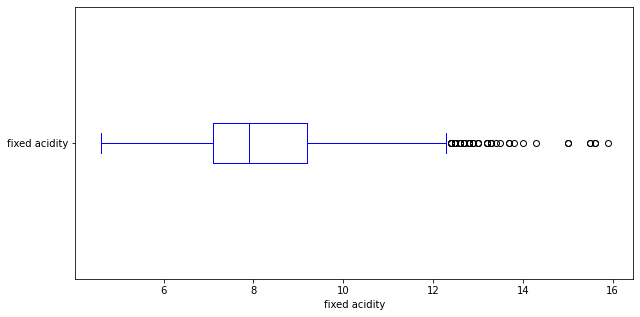

In [ ]:
df['fixed acidity'].plot(kind='box', vert=False, color='blue',
                        figsize=(10,5))

plt.xlabel('fixed acidity')
plt.show()

Outliers found

####Handling Outliers

In [ ]:
df['fixed acidity'].describe()

count    1599.000000
mean        8.319637
std         1.741096
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        15.900000
Name: fixed acidity, dtype: float64

In [ ]:
upperQ = df['fixed acidity'].quantile(q=0.75)
lowerQ = df['fixed acidity'].quantile(q = 0.25)
outlierBound = (upperQ - lowerQ)*1.5
df[(df['fixed acidity'] > (upperQ + outlierBound)) | (df['fixed acidity'] < (lowerQ - outlierBound))].count()

fixed acidity           49
volatile acidity        49
citric acid             49
residual sugar          49
chlorides               49
free sulfur dioxide     49
total sulfur dioxide    49
density                 49
pH                      49
sulphates               49
alcohol                 49
quality                 49
dtype: int64

In [ ]:
df.loc[df['fixed acidity'] > (upperQ + outlierBound), 'fixed acidity'] = upperQ + outlierBound
df.loc[df['fixed acidity'] < (lowerQ - outlierBound), 'fixed acidity'] = lowerQ - outlierBound
df[(df['fixed acidity'] > (upperQ + outlierBound)) | (df['fixed acidity'] < (lowerQ - outlierBound))].count()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Outliers have been handled

###Check second variable **[volatile acidity]** for outliers

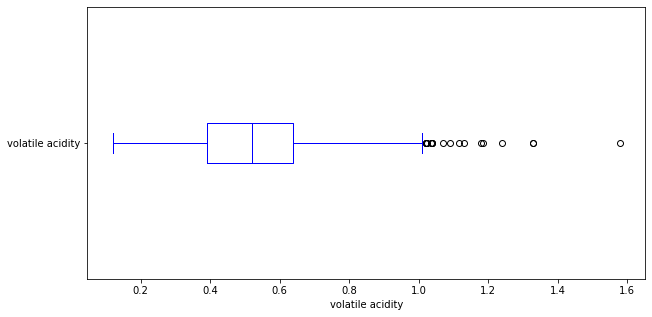

In [ ]:
df['volatile acidity'].plot(kind='box', vert=False, color='blue',
                        figsize=(10,5))

plt.xlabel('volatile acidity')
plt.show()

Outliers found

####Handling Outliers

In [ ]:
df['volatile acidity'].describe()

count    1599.000000
mean        0.527821
std         0.179060
min         0.120000
25%         0.390000
50%         0.520000
75%         0.640000
max         1.580000
Name: volatile acidity, dtype: float64

In [ ]:
upperQ = df['volatile acidity'].quantile(q=0.75)
lowerQ = df['volatile acidity'].quantile(q = 0.25)
outlierBound = (upperQ - lowerQ)*1.5
df[(df['volatile acidity'] > (upperQ + outlierBound)) | (df['volatile acidity'] < (lowerQ - outlierBound))].count()

fixed acidity           19
volatile acidity        19
citric acid             19
residual sugar          19
chlorides               19
free sulfur dioxide     19
total sulfur dioxide    19
density                 19
pH                      19
sulphates               19
alcohol                 19
quality                 19
dtype: int64

In [ ]:
df.loc[df['volatile acidity'] > (upperQ + outlierBound), 'volatile acidity'] = upperQ + outlierBound
df.loc[df['volatile acidity'] < (lowerQ - outlierBound), 'volatile acidity'] = lowerQ - outlierBound
df[(df['volatile acidity'] > (upperQ + outlierBound)) | (df['volatile acidity'] < (lowerQ - outlierBound))].count()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Outliers have been handled

###Check third variable **[citric acid]** for outliers

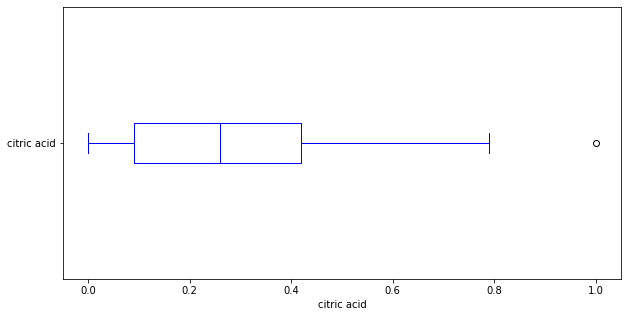

In [ ]:
df['citric acid'].plot(kind='box', vert=False, color='blue',
                        figsize=(10,5))

plt.xlabel('citric acid')
plt.show()

Outliers found

####Handling Outliers

In [ ]:
df['citric acid'].describe()

count    1599.000000
mean        0.270976
std         0.194801
min         0.000000
25%         0.090000
50%         0.260000
75%         0.420000
max         1.000000
Name: citric acid, dtype: float64

In [ ]:
upperQ = df['citric acid'].quantile(q=0.75)
lowerQ = df['citric acid'].quantile(q = 0.25)
outlierBound = (upperQ - lowerQ)*1.5
df[(df['citric acid'] > (upperQ + outlierBound)) | (df['citric acid'] < (lowerQ - outlierBound))].count()

fixed acidity           1
volatile acidity        1
citric acid             1
residual sugar          1
chlorides               1
free sulfur dioxide     1
total sulfur dioxide    1
density                 1
pH                      1
sulphates               1
alcohol                 1
quality                 1
dtype: int64

In [ ]:
df.loc[df['citric acid'] > (upperQ + outlierBound), 'citric acid'] = upperQ + outlierBound
df.loc[df['citric acid'] < (lowerQ - outlierBound), 'citric acid'] = lowerQ - outlierBound
df[(df['citric acid'] > (upperQ + outlierBound)) | (df['citric acid'] < (lowerQ - outlierBound))].count()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Outliers have been handled

###Check fourth variable **[residual sugar]** for outliers

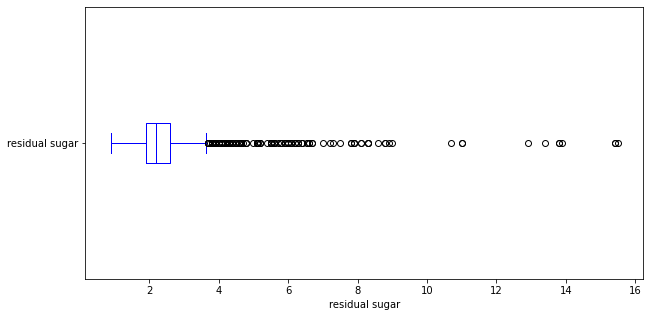

In [ ]:
df['residual sugar'].plot(kind='box', vert=False, color='blue',
                        figsize=(10,5))

plt.xlabel('residual sugar')
plt.show()

Outliers found

####Handling outliers

In [ ]:
df['residual sugar'].describe()

count    1599.000000
mean        2.538806
std         1.409928
min         0.900000
25%         1.900000
50%         2.200000
75%         2.600000
max        15.500000
Name: residual sugar, dtype: float64

In [ ]:
upperQ = df['residual sugar'].quantile(q=0.75)
lowerQ = df['residual sugar'].quantile(q = 0.25)
outlierBound = (upperQ - lowerQ)*1.5
df[(df['residual sugar'] > (upperQ + outlierBound)) | (df['residual sugar'] < (lowerQ - outlierBound))].count()

fixed acidity           155
volatile acidity        155
citric acid             155
residual sugar          155
chlorides               155
free sulfur dioxide     155
total sulfur dioxide    155
density                 155
pH                      155
sulphates               155
alcohol                 155
quality                 155
dtype: int64

In [ ]:
df.loc[df['residual sugar'] > (upperQ + outlierBound), 'residual sugar'] = upperQ + outlierBound
df.loc[df['residual sugar'] < (lowerQ - outlierBound), 'residual sugar'] = lowerQ - outlierBound
df[(df['residual sugar'] > (upperQ + outlierBound)) | (df['residual sugar'] < (lowerQ - outlierBound))].count()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Outliers have been handled

###Check fifth variable **[chlorides]** for outliers

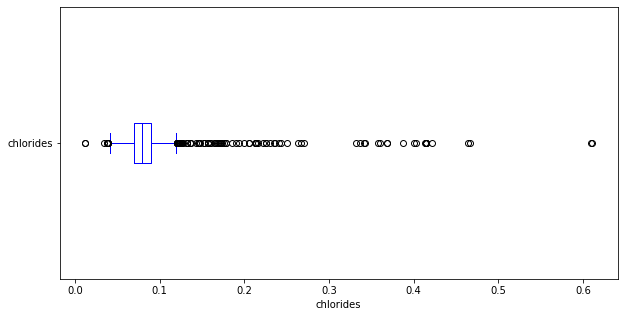

In [ ]:
df['chlorides'].plot(kind='box', vert=False, color='blue',
                        figsize=(10,5))

plt.xlabel('chlorides')
plt.show()

Outliers found

####Handling Outliers

In [ ]:
df['chlorides'].describe()

count    1599.000000
mean        0.087467
std         0.047065
min         0.012000
25%         0.070000
50%         0.079000
75%         0.090000
max         0.611000
Name: chlorides, dtype: float64

In [ ]:
upperQ = df['chlorides'].quantile(q=0.75)
lowerQ = df['chlorides'].quantile(q = 0.25)
outlierBound = (upperQ - lowerQ)*1.5
df[(df['chlorides'] > (upperQ + outlierBound)) | (df['chlorides'] < (lowerQ - outlierBound))].count()

fixed acidity           112
volatile acidity        112
citric acid             112
residual sugar          112
chlorides               112
free sulfur dioxide     112
total sulfur dioxide    112
density                 112
pH                      112
sulphates               112
alcohol                 112
quality                 112
dtype: int64

In [ ]:
df.loc[df['chlorides'] > (upperQ + outlierBound), 'chlorides'] = upperQ + outlierBound
df.loc[df['chlorides'] < (lowerQ - outlierBound), 'chlorides'] = lowerQ - outlierBound
df[(df['chlorides'] > (upperQ + outlierBound)) | (df['chlorides'] < (lowerQ - outlierBound))].count()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Outliers have been handled

###Check sixth variable **[free sulfur dioxide]** for outliers

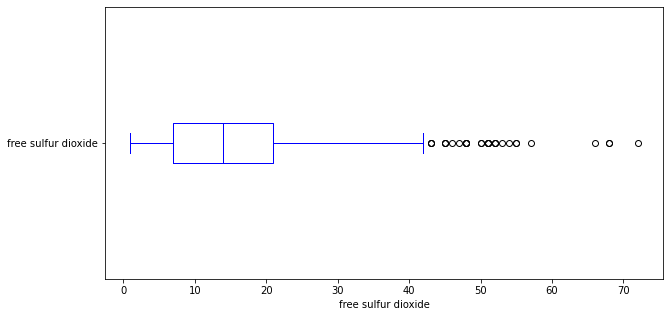

In [ ]:
df['free sulfur dioxide'].plot(kind='box', vert=False, color='blue',
                        figsize=(10,5))

plt.xlabel('free sulfur dioxide')
plt.show()

Outliers found 

####Handling Outliers

In [ ]:
df['free sulfur dioxide'].describe()

count    1599.000000
mean       15.874922
std        10.460157
min         1.000000
25%         7.000000
50%        14.000000
75%        21.000000
max        72.000000
Name: free sulfur dioxide, dtype: float64

In [ ]:
upperQ = df['free sulfur dioxide'].quantile(q=0.75)
lowerQ = df['free sulfur dioxide'].quantile(q = 0.25)
outlierBound = (upperQ - lowerQ)*1.5
df[(df['free sulfur dioxide'] > (upperQ + outlierBound)) | (df['free sulfur dioxide'] < (lowerQ - outlierBound))].count()

fixed acidity           30
volatile acidity        30
citric acid             30
residual sugar          30
chlorides               30
free sulfur dioxide     30
total sulfur dioxide    30
density                 30
pH                      30
sulphates               30
alcohol                 30
quality                 30
dtype: int64

In [ ]:
df.loc[df['free sulfur dioxide'] > (upperQ + outlierBound), 'free sulfur dioxide'] = upperQ + outlierBound
df.loc[df['free sulfur dioxide'] < (lowerQ - outlierBound), 'free sulfur dioxide'] = lowerQ - outlierBound
df[(df['free sulfur dioxide'] > (upperQ + outlierBound)) | (df['free sulfur dioxide'] < (lowerQ - outlierBound))].count()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Outliers have been handled

###Check seventh variable **[total sulfur dioxide]** for outliers

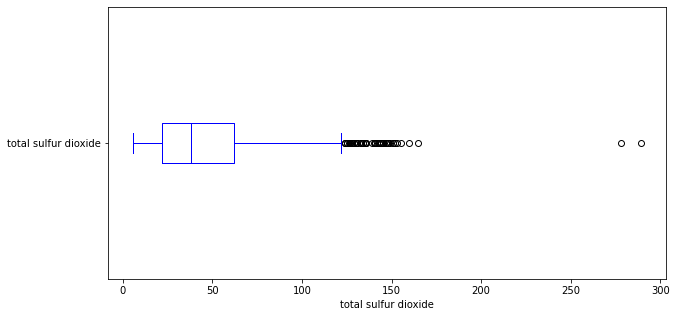

In [ ]:
df['total sulfur dioxide'].plot(kind='box', vert=False, color='blue',
                        figsize=(10,5))

plt.xlabel('total sulfur dioxide')
plt.show()

Outliers found

####Handling Outliers

In [ ]:
df['total sulfur dioxide'].describe()

count    1599.000000
mean       46.467792
std        32.895324
min         6.000000
25%        22.000000
50%        38.000000
75%        62.000000
max       289.000000
Name: total sulfur dioxide, dtype: float64

In [ ]:
upperQ = df['total sulfur dioxide'].quantile(q=0.75)
lowerQ = df['total sulfur dioxide'].quantile(q = 0.25)
outlierBound = (upperQ - lowerQ)*1.5
df[(df['total sulfur dioxide'] > (upperQ + outlierBound)) | (df['total sulfur dioxide'] < (lowerQ - outlierBound))].count()

fixed acidity           55
volatile acidity        55
citric acid             55
residual sugar          55
chlorides               55
free sulfur dioxide     55
total sulfur dioxide    55
density                 55
pH                      55
sulphates               55
alcohol                 55
quality                 55
dtype: int64

In [ ]:
df.loc[df['total sulfur dioxide'] > (upperQ + outlierBound), 'total sulfur dioxide'] = upperQ + outlierBound
df.loc[df['total sulfur dioxide'] < (lowerQ - outlierBound), 'total sulfur dioxide'] = lowerQ - outlierBound
df[(df['total sulfur dioxide'] > (upperQ + outlierBound)) | (df['total sulfur dioxide'] < (lowerQ - outlierBound))].count()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Outliers have been handled

###Check eighth variable **[density]** for outliers

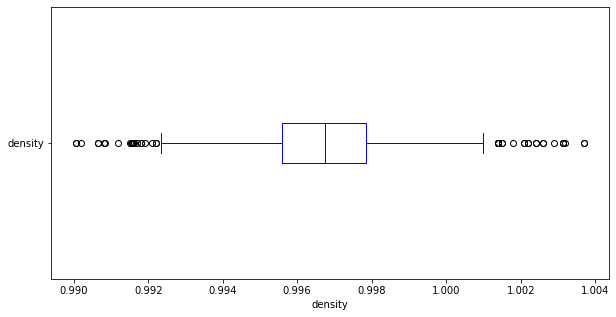

In [ ]:
df['density'].plot(kind='box', vert=False, color='blue',
                        figsize=(10,5))

plt.xlabel('density')
plt.show()

Outliers found

####Handling Outliers

In [ ]:
df['density'].describe()

count    1599.000000
mean        0.996747
std         0.001887
min         0.990070
25%         0.995600
50%         0.996750
75%         0.997835
max         1.003690
Name: density, dtype: float64

In [ ]:
upperQ = df['density'].quantile(q=0.75)
lowerQ = df['density'].quantile(q = 0.25)
outlierBound = (upperQ - lowerQ)*1.5
df[(df['density'] > (upperQ + outlierBound)) | (df['density'] < (lowerQ - outlierBound))].count()

fixed acidity           45
volatile acidity        45
citric acid             45
residual sugar          45
chlorides               45
free sulfur dioxide     45
total sulfur dioxide    45
density                 45
pH                      45
sulphates               45
alcohol                 45
quality                 45
dtype: int64

In [ ]:
df.loc[df['density'] > (upperQ + outlierBound), 'density'] = upperQ + outlierBound
df.loc[df['density'] < (lowerQ - outlierBound), 'density'] = lowerQ - outlierBound
df[(df['density'] > (upperQ + outlierBound)) | (df['density'] < (lowerQ - outlierBound))].count()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Outliers Handled

###Check ninth variable **[pH]** for outliers

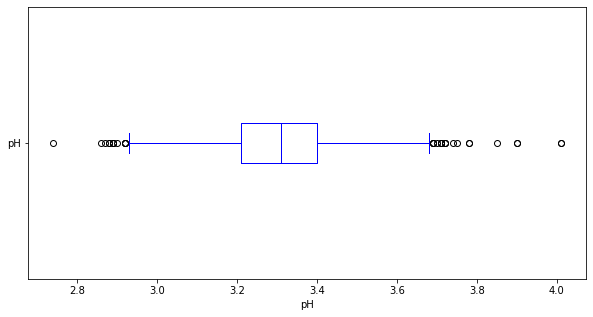

In [ ]:
df['pH'].plot(kind='box', vert=False, color='blue',
                        figsize=(10,5))

plt.xlabel('pH')
plt.show()

Outliers found

####Handling Outliers

In [ ]:
df['pH'].describe()

count    1599.000000
mean        3.311113
std         0.154386
min         2.740000
25%         3.210000
50%         3.310000
75%         3.400000
max         4.010000
Name: pH, dtype: float64

In [ ]:
upperQ = df['pH'].quantile(q=0.75)
lowerQ = df['pH'].quantile(q = 0.25)
outlierBound = (upperQ - lowerQ)*1.5
df[(df['pH'] > (upperQ + outlierBound)) | (df['pH'] < (lowerQ - outlierBound))].count()

fixed acidity           35
volatile acidity        35
citric acid             35
residual sugar          35
chlorides               35
free sulfur dioxide     35
total sulfur dioxide    35
density                 35
pH                      35
sulphates               35
alcohol                 35
quality                 35
dtype: int64

In [ ]:
df.loc[df['pH'] > (upperQ + outlierBound), 'pH'] = upperQ + outlierBound
df.loc[df['pH'] < (lowerQ - outlierBound), 'pH'] = lowerQ - outlierBound
df[(df['pH'] > (upperQ + outlierBound)) | (df['pH'] < (lowerQ - outlierBound))].count()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Outliers Handled

###Check tenth variable **[sulphates]** for outliers

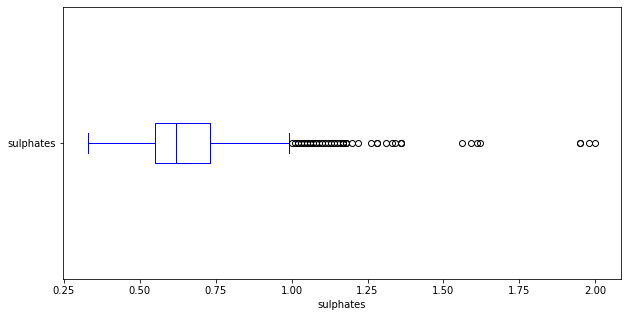

In [ ]:
df['sulphates'].plot(kind='box', vert=False, color='blue',
                        figsize=(10,5))

plt.xlabel('sulphates')
plt.show()

Outliers found

####Handling Outliers

In [ ]:
df['sulphates'].describe()

count    1599.000000
mean        0.658149
std         0.169507
min         0.330000
25%         0.550000
50%         0.620000
75%         0.730000
max         2.000000
Name: sulphates, dtype: float64

In [ ]:
upperQ = df['sulphates'].quantile(q=0.75)
lowerQ = df['sulphates'].quantile(q = 0.25)
outlierBound = (upperQ - lowerQ)*1.5
df[(df['sulphates'] > (upperQ + outlierBound)) | (df['sulphates'] < (lowerQ - outlierBound))].count()

fixed acidity           59
volatile acidity        59
citric acid             59
residual sugar          59
chlorides               59
free sulfur dioxide     59
total sulfur dioxide    59
density                 59
pH                      59
sulphates               59
alcohol                 59
quality                 59
dtype: int64

In [ ]:
df.loc[df['sulphates'] > (upperQ + outlierBound), 'sulphates'] = upperQ + outlierBound
df.loc[df['sulphates'] < (lowerQ - outlierBound), 'sulphates'] = lowerQ - outlierBound
df[(df['sulphates'] > (upperQ + outlierBound)) | (df['sulphates'] < (lowerQ - outlierBound))].count()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Outliers Handled

###Check eleventh variable **[alcohol]** for outliers

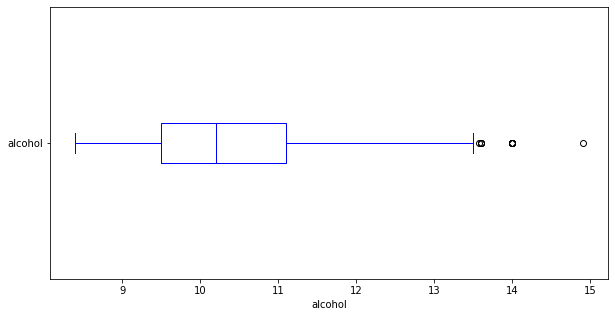

In [ ]:
df['alcohol'].plot(kind='box', vert=False, color='blue',
                        figsize=(10,5))

plt.xlabel('alcohol')
plt.show()

Outliers found

####Handling Outliers

In [ ]:
df['alcohol'].describe()

count    1599.000000
mean       10.422983
std         1.065668
min         8.400000
25%         9.500000
50%        10.200000
75%        11.100000
max        14.900000
Name: alcohol, dtype: float64

In [ ]:
upperQ = df['alcohol'].quantile(q=0.75)
lowerQ = df['alcohol'].quantile(q = 0.25)
outlierBound = (upperQ - lowerQ)*1.5
df[(df['alcohol'] > (upperQ + outlierBound)) | (df['alcohol'] < (lowerQ - outlierBound))].count()

fixed acidity           13
volatile acidity        13
citric acid             13
residual sugar          13
chlorides               13
free sulfur dioxide     13
total sulfur dioxide    13
density                 13
pH                      13
sulphates               13
alcohol                 13
quality                 13
dtype: int64

In [ ]:
df.loc[df['alcohol'] > (upperQ + outlierBound), 'alcohol'] = upperQ + outlierBound
df.loc[df['alcohol'] < (lowerQ - outlierBound), 'alcohol'] = lowerQ - outlierBound
df[(df['alcohol'] > (upperQ + outlierBound)) | (df['alcohol'] < (lowerQ - outlierBound))].count()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Outliers handled

###Check twelth variable **[quality]** for outliers

Quality is on a fixed 10 point scale, so should not be adjusted

##Examine Attributes and Target Variable

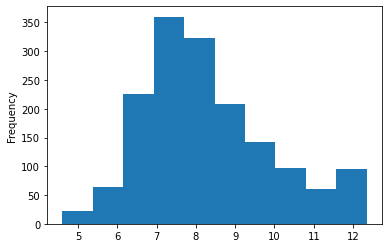

In [ ]:
df['fixed acidity'].plot(kind='hist')

Normally Distributed

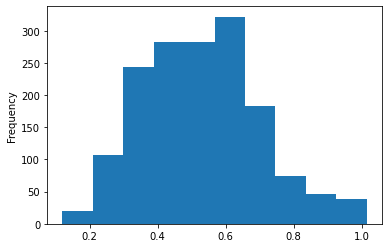

In [ ]:
df['volatile acidity'].plot(kind='hist')

Normally Distributed

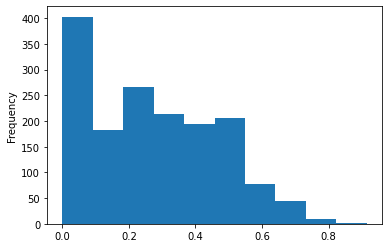

In [ ]:
df['citric acid'].plot(kind='hist')

**[Citric Acid]** is skewed right, most likely because most red wines are not that sour.

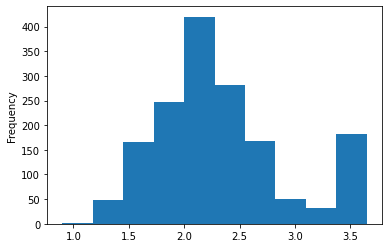

In [ ]:
df['residual sugar'].plot(kind='hist')

Normally distributed. The secondary peak is from the outlier correction

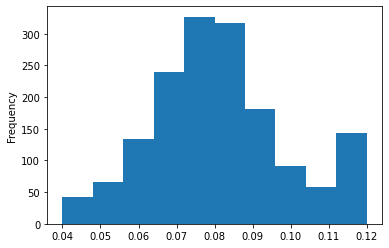

In [ ]:
df['chlorides'].plot(kind='hist')

Normally distributed. The secondary peak is from the outlier correction

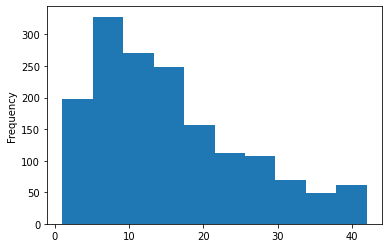

In [ ]:
df['free sulfur dioxide'].plot(kind='hist')

Skewed right, most likely due to the fact that sulfur dioxide, though mainly used as a preservative, can alter the taste of the wine

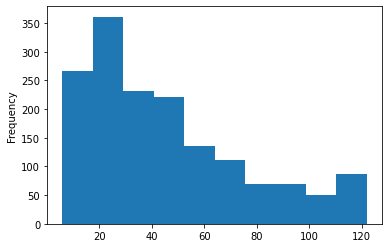

In [ ]:
df['total sulfur dioxide'].plot(kind='hist')

Skewed right, for a similar reason as previously stated

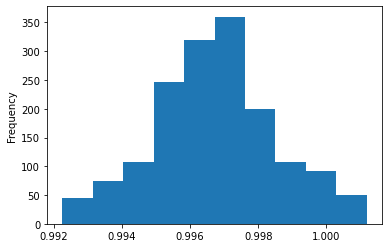

In [ ]:
df['density'].plot(kind='hist')

Normally distributed

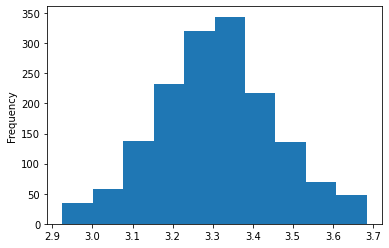

In [ ]:
df['pH'].plot(kind='hist')

Normally distributed

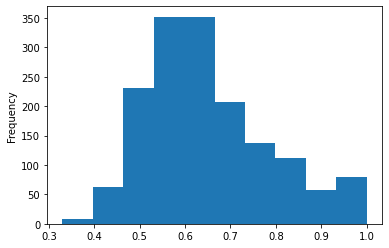

In [ ]:
df['sulphates'].plot(kind='hist')

This is skewed right, though it is not as clear because of the outlier correction. The skew is because **[sulphates]** come from the **[sulphur dioxide]** previously discussed, and thus are skewed the way they are for the same reason.

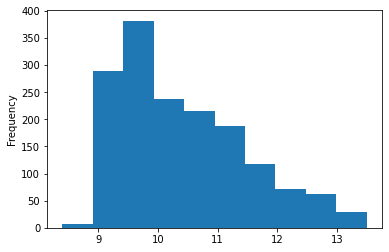

In [ ]:
df['alcohol'].plot(kind='hist')

This is skewed right, most likely because red wine is naturally high in alcohol, thus the values basically starting at 9, and the more expensive wines generally have higher alcohol content, but more expensive wines are less common.

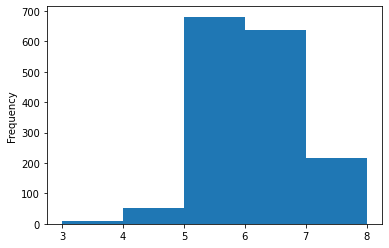

In [ ]:
df['quality'].plot(kind='hist', bins = 5)

Quality is skewed left, most likely due to the fact that low quality wines simply won't do as well on the market, causing higher quality wines to be more likely to stick around.

##Normalize the values

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()  
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
df_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.361290,0.648045,0.000000,0.363636,0.4500,0.243902,0.241379,0.621085,0.769737,0.343284,0.196078,0.4
1,0.412903,0.849162,0.000000,0.618182,0.7250,0.585366,0.525862,0.509228,0.361842,0.522388,0.274510,0.4
2,0.412903,0.715084,0.043716,0.509091,0.6500,0.341463,0.413793,0.531600,0.440789,0.477612,0.274510,0.4
3,0.851613,0.178771,0.612022,0.363636,0.4375,0.390244,0.465517,0.643456,0.309211,0.373134,0.274510,0.6
4,0.361290,0.648045,0.000000,0.363636,0.4500,0.243902,0.241379,0.621085,0.769737,0.343284,0.196078,0.4


##Attribute Correlation and Selecting important variables

In [ ]:
df.corr()['quality']

fixed acidity           0.125442
volatile acidity       -0.387608
citric acid             0.227144
residual sugar          0.023790
chlorides              -0.183037
free sulfur dioxide    -0.050641
total sulfur dioxide   -0.201542
density                -0.176330
pH                     -0.061507
sulphates               0.328710
alcohol                 0.478556
quality                 1.000000
Name: quality, dtype: float64

The variables with the most correlation with quality are, in descending order, **[alcohol]**, **[volatile acidity]**, **[sulphates]**, and **[citric acid]**.

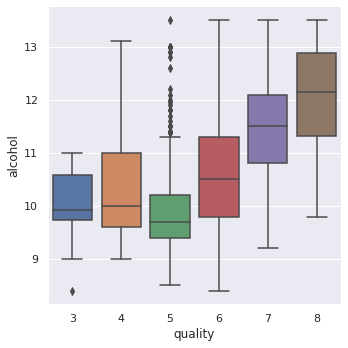

In [ ]:
sns.set_theme()
sns.catplot(data = df, x = 'quality', y = 'alcohol', kind = "box")

As you go up the wine quality grades, the average alcohol content increases, so there is a positive correlation. Accordingly, the correlation is **[0.479]**

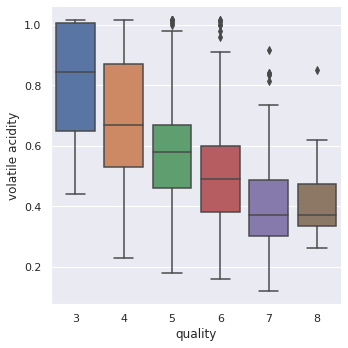

In [ ]:
sns.catplot(data = df, x = 'quality', y = 'volatile acidity', kind = "box")

On the other hand, as the quality of the wine increases, the average volatile acidity decreases, a negative correlation. Accordingly the correlation is **[-0.388]**.

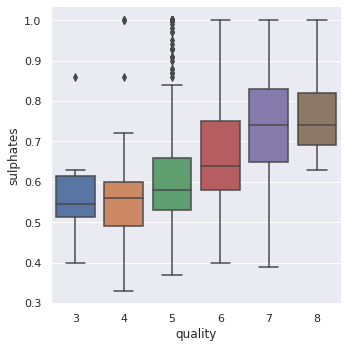

In [ ]:
sns.catplot(data = df, x = 'quality', y = 'sulphates', kind = "box")

The amount of sulphates has a weaker positive correlation with quality, and the correlation is **[0.329]**

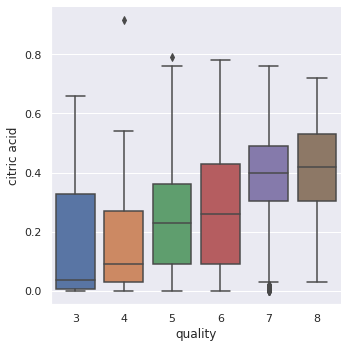

In [ ]:
sns.catplot(data = df, x = 'quality', y = 'citric acid', kind = "box")

The amount of citric acid also has a positive correlation, with a correlation of **[0.227]**

##Splitting data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split
X = df_scaled[['alcohol', 'volatile acidity', 'sulphates', 'citric acid']]
Y = df_scaled[['quality']]
dfX_train, dfX_test, dfY_train, dfY_test = train_test_split(X, Y, test_size=0.2)

#Model Construction

##OLS Model

In [ ]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
dfX_train_off = sm.add_constant(dfX_train)
smRegression = sm.OLS(dfY_train, dfX_train_off)
 
model = smRegression.fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     177.5
Date:                Thu, 22 Sep 2022   Prob (F-statistic):          6.72e-121
Time:                        16:14:30   Log-Likelihood:                 797.96
No. Observations:                1279   AIC:                            -1586.
Df Residuals:                    1274   BIC:                            -1560.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4307      0.019  

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


##SGD Model

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE:  0.016718543041807612
R^2 Score:  0.335865709964815


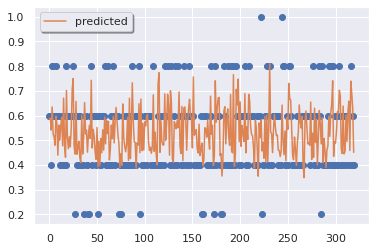

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score

#attributes to change for tuning
df_alpha = 0.001
df_max_iter = 50000
df_power_t = 0.01
df_n = 15

sgd = SGDRegressor(max_iter=df_max_iter, alpha=df_alpha, power_t = df_power_t, n_iter_no_change = df_n)
sgd.fit(dfX_train, dfY_train)

dfY_Pred_SGD = sgd.predict(dfX_test)

mse = mean_squared_error(dfY_test, dfY_Pred_SGD)
r2s = r2_score(dfY_test, dfY_Pred_SGD)
print("MSE: ", mse)
print("R^2 Score: ", r2s)

df_range = range(len(dfY_Pred_SGD))
plt.plot(df_range, dfY_test, 'o')
plt.plot(df_range, dfY_Pred_SGD, label = "predicted")
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 